<a href="https://colab.research.google.com/github/nadivaagista07/Scientific-Computing/blob/main/SC_Sesi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul Sesi 2 - System of Linear Equation and Regression**

1.Diketahui persamaan berikut:

2x + 3y -z = 10

x - y + 2z = 4

3x + 2y + z = 14


a.	Tentukan nilai x, y, z dengan metode Gauss Seidel. Gunakan nilai initial: x = 5, y = 5, z = 5 dengan error tolerance = 0.001

b.	Bandingkan hasilnya dengan menggunakan library Numpy

In [32]:
#1.a
def gauss_seidel(A, B, X, tolerance=0.001, max_iter=100):
    n = len(B)
    X_new = X[:]

    for iteration in range(max_iter):
        X_old = X_new[:]

        for i in range(n):
            if A[i][i] == 0:
                raise ValueError("Matriks tidak dapat diselesaikan dengan Gauss-Seidel (pembagian dengan nol).")

            sum_ax = sum(A[i][j] * X_new[j] for j in range(n) if j != i)
            X_new[i] = (B[i] - sum_ax) / A[i][i]

        error = max(abs(X_new[i] - X_old[i]) for i in range(n))

        if error < tolerance:
            print(f"Konvergen setelah {iteration + 1} iterasi.")
            return X_new, iteration + 1

    raise ValueError("Metode Gauss-Seidel tidak konvergen setelah {} iterasi.".format(max_iter))

A1 = [
    [2, 3, -1],
    [1, -1, 2],
    [3, 2, 1]
]
B1 = [10, 4, 14]
X1 = [5.0, 5.0, 5.0]

try:
    hasil_gs_1, iterasi = gauss_seidel(A1, B1, X1)
    print("\n Hasil Gauss-Seidel:")
    print(f"x = {hasil_gs_1[0]:.4f}, y = {hasil_gs_1[1]:.4f}, z = {hasil_gs_1[2]:.4f}")
    print(f" Iterasi yang dibutuhkan: {iterasi}")
except ValueError as e:
    print(e)


Metode Gauss-Seidel tidak konvergen setelah 100 iterasi.


In [23]:
import numpy as np

A = np.array([[2, 3, -1],
              [1, -1, 2],
              [3, 2, 1]])

y = np.array([10, 4, -14])

x = np.linalg.solve(A, y)
print(x)

[-6.30503948e+16  6.30503948e+16  6.30503948e+16]


2.	Diketahui persamaan berikut:

3x - 0.1y - 0.2z = 7.85

0.1x + 7y - 0.3z = -19.3

0.3x - 0.2y + 10z = 71.4

a.	Tentukan nilai x, y, z dengan metode Gauss Seidel. Gunakan nilai initial: x = 1, y = 2, z = 3 dengan error tolerance = 0.001

b.	Bandingkan hasilnya dengan menggunakan library Numpy

In [33]:
#2.a
import numpy as np

A = np.array([
    [3, -0.1, -0.2],
    [0.1, 7, -0.3],
    [0.3, -0.2, 10]
])

diag = np.diag(np.abs(A))
off_diag = np.sum(np.abs(A), axis=1) - diag

if np.all(diag > off_diag):
    print("Matrix is diagonally dominant")
else:
    print("Matrix is NOT diagonally dominant")

x1, x2, x3 = 1, 2, 3
epsilon = 0.001
converged = False

x_old = np.array([x1, x2, x3])

print("Iteration results:")
print(" k,    x1,    x2,    x3 ")

# Iterasi metode Gauss-Seidel
for k in range(1, 20):
    x1 = (7.85 + 0.1 * x2 + 0.2 * x3) / 3
    x2 = (-19.3 - 0.1 * x1 + 0.3 * x3) / 7
    x3 = (71.4 - 0.3 * x1 + 0.2 * x2) / 10

    x = np.array([x1, x2, x3])

    dx = np.sqrt(np.dot(x - x_old, x - x_old))

    print("%d, %.4f, %.4f, %.4f" % (k, x1, x2, x3))

    if dx < epsilon:
        converged = True
        print("Converged!")
        break

    x_old = x

if not converged:
    print("Not converged, increase the # of iterations")


Matrix is diagonally dominant
Iteration results:
 k,    x1,    x2,    x3 
1, 2.8833, -2.6698, 7.0001
2, 2.9943, -2.4999, 7.0002
3, 3.0000, -2.5000, 7.0000
4, 3.0000, -2.5000, 7.0000
Converged!


In [28]:
import numpy as np

A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]])

y = np.array([7.85, -19.3, 71.4])

x = np.linalg.solve(A, y)
print(x)

[ 3.  -2.5  7. ]




4.a.	Tentukan nilai alpha variabel (nilai a dan b pada persamaan y=ax+b) dengan Least Square Method

b.	Buatlah plot hasil regresi kalian bersama dengan titik-titik pada soal

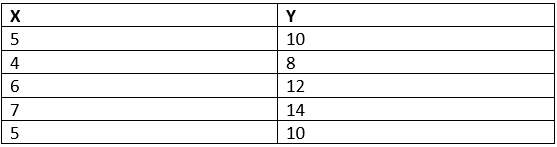

In [34]:
import numpy as np

X = np.array([5, 4, 6, 7, 5])
Y = np.array([10, 8, 12, 14, 10])

n = len(X)
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Rumus Least Squares Method
a = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
b = Y_mean - a * X_mean

print(f"Persamaan regresi: y = {a:.4f}x + {b:.4f}")


Persamaan regresi: y = 2.0000x + 0.0000


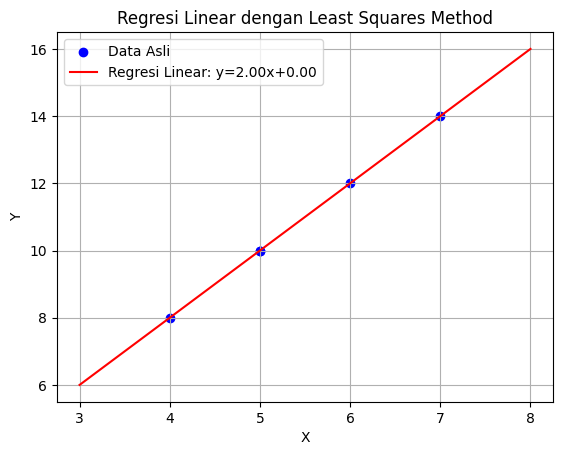

In [35]:
import matplotlib.pyplot as plt

X_reg = np.linspace(min(X) - 1, max(X) + 1, 100)
Y_reg = a * X_reg + b

plt.scatter(X, Y, color='blue', label='Data Asli')

plt.plot(X_reg, Y_reg, color='red', label=f'Regresi Linear: y={a:.2f}x+{b:.2f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresi Linear dengan Least Squares Method')
plt.legend()
plt.grid()

plt.show()
